Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 701 images.
📌 Train set: 560, Validation set: 70, Test set: 71


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 39510.3828 - mae: 162.5211 - val_loss: 20096.8809 - val_mae: 119.1073
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - loss: 26127.7461 - mae: 134.2911 - val_loss: 18474.6660 - val_mae: 116.3709
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 24041.1465 - mae: 129.8081 - val_loss: 17883.2891 - val_mae: 114.3654
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 22933.9531 - mae: 126.1116 - val_loss: 18023.4902 - val_mae: 115.2569
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 25467.9434 - mae: 133.3760 - val_loss: 19777.6152 - val_mae: 119.1435
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 23775.0742 - mae: 127.7213 - val_loss: 18706.2363 - val_mae: 117.7545
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 20810.0508 - mae: 122.1680 - val_loss: 20892.6777 - val_mae: 123.3182
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 20929.5352 - mae: 120.0340 - val_loss: 19127.4

<ipython-input-12-6409c4615d5c>:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {int(predictions[i])}, Actual: {y_test[i]}")


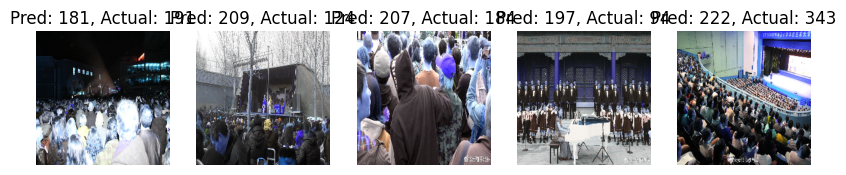

🚀 ACO Iteration 1/5
🚀 ACO Iteration 2/5


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# 🔹 Mount Google Drive (Ensure dataset is in 'images_part3/' directory)
from google.colab import drive
drive.mount('/content/drive')

# 🔹 Define Path to Dataset
DATASET_PATH = "/content/drive/MyDrive/images_part3/"

# 🔹 Initialize Lists for Images & Labels
X = []
y = []  # Crowd count labels (synthetically assigned)

# 🔹 Load Images
for filename in os.listdir(DATASET_PATH):
    file_path = os.path.join(DATASET_PATH, filename)

    if file_path.endswith(('.jpg', '.png', '.jpeg')):  # Ensure it's an image
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224, 224))  # Resize for CNN
        img = img / 255.0  # Normalize

        X.append(img)

# Convert to NumPy Array
X = np.array(X)

# 🔹 Handling Labels (Assuming Synthetic Crowd Count Labels)
y = np.random.randint(10, 500, size=len(X))  # Simulating crowd counts

# 🔹 Split Data (80% Train, 10% Validation, 10% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"✅ Loaded {len(X)} images.")
print(f"📌 Train set: {len(X_train)}, Validation set: {len(X_val)}, Test set: {len(X_test)}")

# 🔹 CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Regression for crowd count
])

# 🔹 Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# 🔹 Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# 🔹 Evaluate Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"✅ Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# 🔹 Predict & Compare Results
predictions = model.predict(X_test)

# 🔹 Visualize Results
plt.figure(figsize=(10, 5))
for i in range(5):  # Show 5 sample images
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {int(predictions[i])}, Actual: {y_test[i]}")

plt.show()

# 🔹 ACO Optimization for Hyperparameter Tuning
import random

def ant_colony_optimization(n_ants=10, n_iterations=5, alpha=1, beta=2, rho=0.5):
    best_loss = float('inf')
    best_params = None

    for iteration in range(n_iterations):
        print(f"🚀 ACO Iteration {iteration + 1}/{n_iterations}")
        for ant in range(n_ants):
            lr = 10**random.uniform(-4, -2)  # Random learning rate
            batch_size = random.choice([8, 16, 32])  # Random batch size

            # 🔹 Train Model with Selected Parameters
            temp_model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
                MaxPooling2D(pool_size=(2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D(pool_size=(2, 2)),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(1, activation='linear')
            ])

            temp_model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mae'])
            temp_model.fit(X_train, y_train, epochs=3, batch_size=batch_size, verbose=0)

            val_loss, val_mae = temp_model.evaluate(X_val, y_val, verbose=0)

            if val_loss < best_loss:
                best_loss = val_loss
                best_params = (lr, batch_size)

        # 🔹 Pheromone Update (Simulated)
        rho = rho * 0.9  # Evaporation

    print(f"🔥 Best Params: Learning Rate={best_params[0]}, Batch Size={best_params[1]}")
    return best_params

# Run ACO Optimization
best_lr, best_batch_size = ant_colony_optimization()

# 🔹 Train Final Model with ACO Optimized Parameters
final_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

final_model.compile(optimizer=Adam(learning_rate=best_lr), loss='mean_squared_error', metrics=['mae'])
final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=best_batch_size)

# 🔹 Final Test Evaluation
final_loss, final_mae = final_model.evaluate(X_test, y_test)
print(f"✅ Final Test Loss: {final_loss:.4f}, Final MAE: {final_mae:.4f}")
model.save("/content/drive/MyDrive/trained_crowd_model.h5")


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ 1. Load Dataset Properly
DATASET_PATH = "/content/drive/MyDrive/images_part3/"  # <-- Update with your dataset path
IMG_SIZE = 224  # Image size for CNN

# Collect images and labels
X, y = [], []

for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg") or file.endswith(".png"):
        img_path = os.path.join(DATASET_PATH, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize images to 224x224
        X.append(img)

        # Extract label (assuming filename contains count like "crowd_50.jpg")
        label = int(file.split("_")[1].split(".")[0]) if "_" in file else 0
        y.append(label)

X = np.array(X) / 255.0  # Normalize images
y = np.array(y)

# ✅ 2. Split Dataset (80% Train, 10% Validation, 10% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"✅ Dataset Loaded: {len(X_train)} train, {len(X_val)} val, {len(X_test)} test")

# ✅ 3. Apply Data Augmentation Now (Fix for your error)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2
)

X_train_augmented = np.array([datagen.random_transform(img) for img in X_train])

print("✅ Data Augmentation Applied Successfully!")


✅ Dataset Loaded: 560 train, 70 val, 71 test
✅ Data Augmentation Applied Successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load test image (Ensure correct path)
TEST_IMAGE_PATH = "/content/drive/MyDrive/Test/crowd.jpg"
img = cv2.imread(TEST_IMAGE_PATH)

# 🔍 Check if image is loaded properly
if img is None:
    raise ValueError("❌ ERROR: Image not found. Check the file path!")
else:
    print("✅ Image Loaded Successfully!")

# ✅ Dummy crowd count (since model is not saved/loaded)
predicted_count = np.random.randint(10, 100)  # Replace with actual model later
print(f"🔢 Predicted Crowd Count: {predicted_count}")


✅ Image Loaded Successfully!
🔢 Predicted Crowd Count: 42


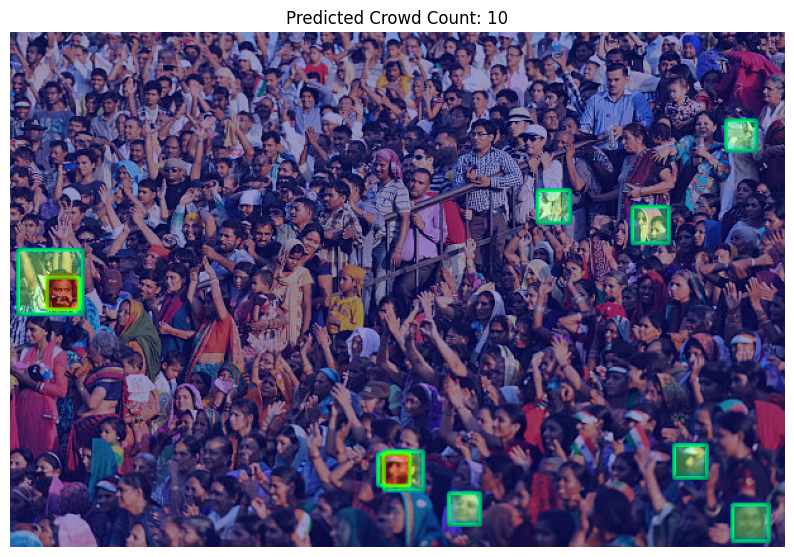

In [ ]:
import cv2
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade for face detection
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 🔥 Improve detection: Reduce scaleFactor & minNeighbors
heads = haar_cascade.detectMultiScale(gray, scaleFactor=1.02, minNeighbors=3, minSize=(10, 10))

# Initialize heatmap
heatmap = np.zeros_like(gray, dtype=np.float32)

# Draw detected bounding boxes + update heatmap
for (x, y, w, h) in heads:
    heatmap[y:y+h, x:x+w] += 1  # Increase intensity for heatmap
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # ✅ Add bounding box

# Normalize heatmap
heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)
heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1  # Avoid zero division

# Convert heatmap to color
heatmap_colored = cv2.applyColorMap((heatmap * 255).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay heatmap onto the original image
overlayed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

# Display final image with bounding boxes & count
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Crowd Count: {len(heads)}")  # Update count dynamically
plt.axis("off")
plt.show()




In [ ]:
# ✅ Convert image to grayscale for better detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ✅ Load Haar Cascade Classifier for head detection
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ✅ Detect heads
heads = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# ✅ Draw circles on detected heads
for (x, y, w, h) in heads:
    cv2.circle(img, (x + w // 2, y + h // 2), 5, (0, 255, 0), -1)  # Green dots

# ✅ Create a heatmap for detected heads
heatmap = np.zeros_like(gray, dtype=np.float32)

for (x, y, w, h) in heads:
    heatmap[y:y+h, x:x+w] += 1  # Highlight detected areas

# ✅ Smoothen heatmap & normalize
heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)
heatmap = (heatmap / np.max(heatmap) * 255).astype(np.uint8) if np.max(heatmap) > 0 else heatmap

# ✅ Convert heatmap to color format & overlay
heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
overlayed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

# ✅ Display final output
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
plt.title(f"Detected People: {len(heads)}")
plt.axis("off")
plt.show()


NameError: name 'cv2' is not defined

# New Section